<a href="https://colab.research.google.com/github/brennocurtolo/C-digos-UFU/blob/main/Trabalho_1_Modelagem_e_simula%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1

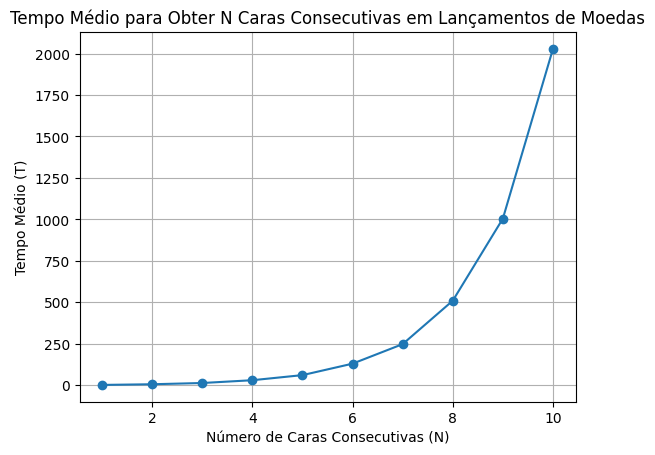

In [ ]:
import random
import matplotlib.pyplot as plt

def simular_lancamentos(simulacoes, n_caras_consecutivas):
    tempos = []

    for _ in range(simulacoes):
        sequencia = []
        tempo = 0
        caras_consecutivas = 0

        while True:
            resultado = random.choice(['H', 'T']) #H (Cara) T (Coroa)
            sequencia.append(resultado)

            if resultado == 'H':
                caras_consecutivas += 1
            else:
                caras_consecutivas = 0

            if caras_consecutivas >= n_caras_consecutivas:
                break

            tempo += 1

        tempos.append(tempo)

    tempo_medio = sum(tempos) / simulacoes #Soma de todos os tempos dividido pela quantidade de simulação
    return tempo_medio

simulacoes = 1000
max_n_caras_consecutivas = 10  # Você pode ajustar isso de acordo com suas necessidades

tempos_medios = []

for n in range(1, max_n_caras_consecutivas + 1):
    tempo_medio = simular_lancamentos(simulacoes, n)
    tempos_medios.append(tempo_medio)

plt.plot(range(1, max_n_caras_consecutivas + 1), tempos_medios, marker='o')
plt.xlabel('Número de Caras Consecutivas (N)')
plt.ylabel('Tempo Médio (T)')
plt.title('Tempo Médio para Obter Pelo Menos N Caras Consecutivas em Lançamentos de Moedas')
plt.grid(True)
plt.show()


________________________________________________________________________________

Questão 2 A)

In [9]:
import random

def rolar_d20_normal():
    return random.randint(1, 20)

n_simulacoes = 100  # Para 100 simulações
sum_rolagem_normal = 0
sum_rolagem_vantagem = 0

for _ in range(n_simulacoes):
    resultado_normal = rolar_d20_normal()
    resultado_vantagem = max(rolar_d20_normal(), rolar_d20_normal())
    sum_rolagem_normal += resultado_normal
    sum_rolagem_vantagem += resultado_vantagem

media_normal = sum_rolagem_normal / n_simulacoes
media_vantagem = sum_rolagem_vantagem / n_simulacoes

print(f"Diferença entre as médias: {media_vantagem - media_normal}")


Diferença entre as médias: 2.9700000000000006


B)

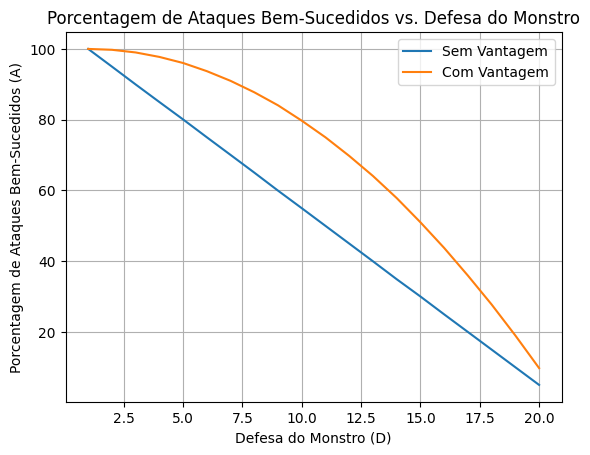

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def probabilidade_sucesso(D, vantagem=False, num_simulacoes=1000000):
    if vantagem:
        rolagens1 = np.random.randint(1, 21, num_simulacoes)
        rolagens2 = np.random.randint(1, 21, num_simulacoes)
        rolagens_vantagem = np.maximum(rolagens1, rolagens2)
        ataques_bem_sucedidos = np.sum(rolagens_vantagem >= D)
    else:
        rolagens = np.random.randint(1, 21, num_simulacoes)
        ataques_bem_sucedidos = np.sum(rolagens >= D)

    return ataques_bem_sucedidos / num_simulacoes * 100  # Em porcentagem

D = np.arange(1, 21)
A_sem_vantagem = [probabilidade_sucesso(d, vantagem=False) for d in D]
A_com_vantagem = [probabilidade_sucesso(d, vantagem=True) for d in D]

plt.plot(D, A_sem_vantagem, label='Sem Vantagem')
plt.plot(D, A_com_vantagem, label='Com Vantagem')
plt.xlabel('Defesa do Monstro (D)')
plt.ylabel('Porcentagem de Ataques Bem-Sucedidos (A)')
plt.legend()
plt.grid(True)
plt.title('Porcentagem de Ataques Bem-Sucedidos vs. Defesa do Monstro')
plt.show()

C)

Em todos os casos usar a vantagem é mais vantajoso:

Onde (D < 10): A vantagem é significativamente mais benéfica, resultando em uma grande diferença das probabilidades de ataques bem-sucedidos em comparação com a falta de Vantagem. Isso significa que, em encontros onde o monstro tem uma defesa baixa, ter Vantagem é extremamente vantajoso para o jogador.

Onde (10 <= D <= 15): A diferença entre as probabilidades de ataques bem-sucedidos com e sem Vantagem diminui à medida que D aumenta. No entanto, a Vantagem ainda proporciona uma vantagem significativa, embora menos do que em valores baixos de D.

Onde (D > 15): À medida que D aumenta e se aproxima de 20, a diferença entre as probabilidades de ataques bem-sucedidos com e sem Vantagem se torna muito pequena. Isso indica que, em encontros onde o monstro possui uma defesa muito alta, a habilidade "Vantagem" oferece uma vantagem menor, mas não deixa se ser mais vantajoso do que não utiliza-la.

________________________________________________________________________________

Questão 3

In [20]:
import random

def simular_lancamentos(N):
    lancamentos = 0
    moedas = ["T"] * N  # Inicialmente, todas as moedas são "T" (Coroa)

    while any(m == "T" for m in moedas):  # Enquanto houver alguma moeda "T" (Coroa)
        lancamentos += 1
        for i in range(N):
            if moedas[i] == "T":
                moedas[i] = random.choice(["T", "H"])  # Lança a moeda novamente (aleatoriamente)

    return lancamentos

N = 10  # Altere este valor para o número desejado de moedas
num_simulacoes = 10000  # Número de simulações para obter uma média

soma_lancamentos = 0

for _ in range(num_simulacoes):
    soma_lancamentos += simular_lancamentos(N)

media_lancamentos = soma_lancamentos / num_simulacoes
print(f"Número médio de lançamentos para {N} moedas: {media_lancamentos:.2f}")


Número médio de lançamentos para 10 moedas: 4.74


________________________________________________________________________________

Questão 4

In [21]:
import random

# Função para simular o sexo de uma criança
def simula_sexo():
    return random.choice(['M', 'F'])

# Número de simulações
num_simulacoes = 100000
contagem_ambos_masculinos = 0
contagem_um_masculino = 0

for _ in range(num_simulacoes):
    filho_A = simula_sexo()
    filho_B = simula_sexo()

    # Verifique se pelo menos um dos filhos é do sexo masculino
    if filho_A == 'M' or filho_B == 'M':
        contagem_um_masculino += 1

        # Verifique se ambos os filhos são do sexo masculino
        if filho_A == 'M' and filho_B == 'M':
            contagem_ambos_masculinos += 1

probabilidade_condicional = contagem_ambos_masculinos / contagem_um_masculino

print(f'Probabilidade de ambos serem do sexo masculino dado que um deles é do sexo masculino: {probabilidade_condicional:.2f}')


Probabilidade de ambos serem do sexo masculino dado que um deles é do sexo masculino: 0.33


________________________________________________________________________________

Questão 5

A)

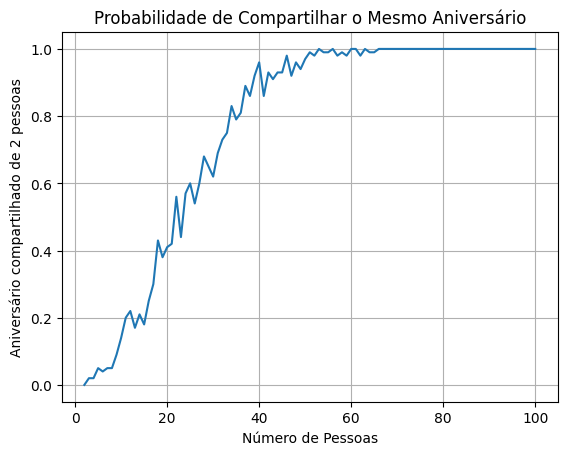

In [136]:
import random
import matplotlib.pyplot as plt

def probabilidade_aniversario(N, num_simulacoes):
    count = 0  # Contador para contar as vezes que pelo menos duas pessoas compartilham o mesmo aniversário

    for _ in range(num_simulacoes):
        aniversarios = [random.randint(1, 365) for _ in range(N)]  # Simula os aniversários de N pessoas
        if len(aniversarios) != len(set(aniversarios)):
            count += 1  # Se houver pelo menos duas datas de aniversário duplicadas, aumenta no contador

    prob = count / num_simulacoes  # Calcula a probabilidade

    return prob

N_valores = list(range(2, 101))  # Tamanho do grupo de 2 a 100
probabilidades_N2 = [probabilidade_aniversario(N, 100) for N in N_valores]  # Probabilidades para N de 2 a 100

plt.plot(N_valores, probabilidades_N2)
plt.xlabel('Número de Pessoas')
plt.ylabel('Aniversário compartilhado de 2 pessoas')
plt.title('Probabilidade de Compartilhar o Mesmo Aniversário')
plt.grid(True)
plt.show()


B)

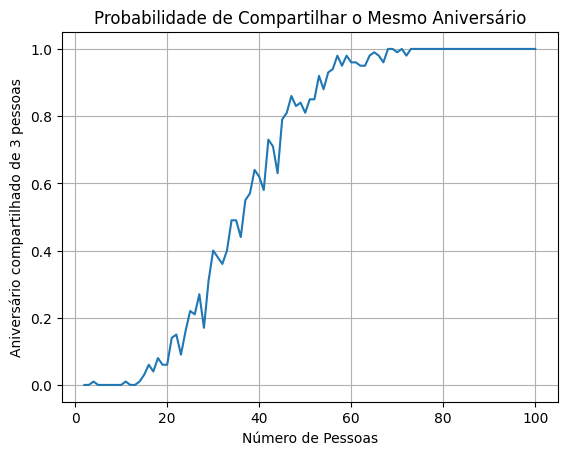

In [137]:
import random
import matplotlib.pyplot as plt

def probabilidade_aniversario(N, num_simulacoes):
    count = 0  # Contador para contar as vezes que pelo menos três pessoas compartilham o mesmo aniversário

    for _ in range(num_simulacoes):
        aniversarios = [random.randint(1, 365) for _ in range(N)]  # Simula os aniversários de N pessoas
        if len(aniversarios) - len(set(aniversarios)) >= 2:
            count += 1  # Se houver pelo menos duas datas de aniversário duplicadas, aumenta no contador

    prob = count / num_simulacoes  # Calcula a probabilidade

    return prob

N_valores = list(range(2, 101))  # Tamanho do grupo de 2 a 100
probabilidades_N3 = [probabilidade_aniversario(N, 100) for N in N_valores]  # Probabilidades para N de 2 a 100

plt.plot(N_valores, probabilidades_N3)
plt.xlabel('Número de Pessoas')
plt.ylabel('Aniversário compartilhado de 3 pessoas')
plt.title('Probabilidade de Compartilhar o Mesmo Aniversário')
plt.grid(True)
plt.show()


________________________________________________________________________________

Questão 6

A)

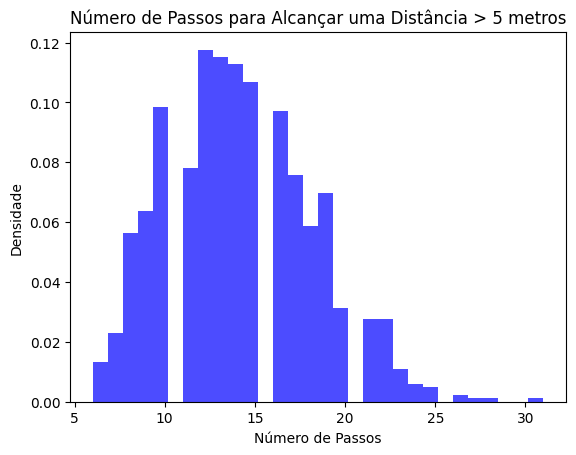

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def passos_bebado(n_passos):
    x, y = 0, 0
    for _ in range(n_passos):
        angle = np.random.uniform(0, 2 * np.pi)  # Escolhe um ângulo aleatório em radianos
        x += np.cos(angle)  # Move-se 1 metro na direção x
        y += np.sin(angle)  # Move-se 1 metro na direção y
    distancia_percorrida = np.sqrt(x**2 + y**2)
    return distancia_percorrida

simulacoes = 1000
distancias = []

for _ in range(simulacoes):
    n_passos = 0
    distancia = 0
    while distancia <= 5:
        n_passos += 1
        distancia = passos_bebado(n_passos)
    distancias.append(n_passos) #Adiciona no começo do array

plt.hist(distancias, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Número de Passos')
plt.ylabel('Densidade')
plt.title('Número de Passos para Alcançar uma Distância > 5 metros')
plt.show()


B)

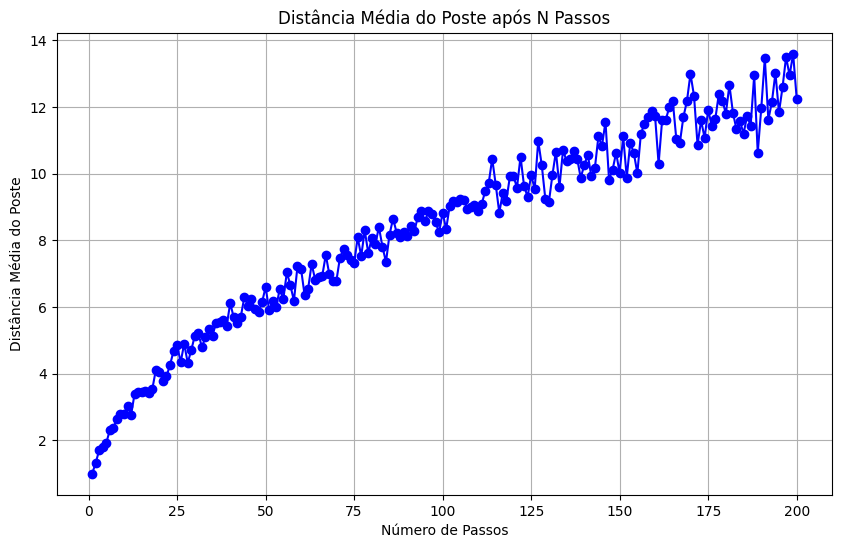

In [138]:
import numpy as np
import matplotlib.pyplot as plt

def passos_bebado(n_passos):
    x, y = 0, 0
    for _ in range(n_passos):
        angle = np.random.uniform(0, 2 * np.pi)  # Escolhe um ângulo aleatório em radianos
        x += np.cos(angle)  # Move-se 1 metro na direção x
        y += np.sin(angle)  # Move-se 1 metro na direção y
    distancia_percorrida = np.sqrt(x**2 + y**2)
    return distancia_percorrida

# Número de simulações
simulacoes = 100

# Número máximo de passos
max_passos = 200

# Listas para armazenar as distâncias médias
distancias_medias = []

for passos in range(1, max_passos + 1):
    distancia_passo = []
    for _ in range(simulacoes):
        distancia = passos_bebado(passos)
        distancia_passo.append(distancia)

    distancia_media_atual = np.mean(distancia_passo)
    distancias_medias.append(distancia_media_atual)

# Plotar o gráfico D por N
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_passos + 1), distancias_medias, color='blue', marker='o', linestyle='-')
plt.title('Distância Média do Poste após N Passos')
plt.xlabel('Número de Passos')
plt.ylabel('Distância Média do Poste')
plt.grid(True)
plt.show()


________________________________________________________________________________

Questão 7

A)

In [135]:
import numpy as np

adjacencias_probabilidade = np.array([
    [0, 1/5, 1/5, 1/5, 0, 0, 1/5, 0, 1/5, 0, 0, 0, 0],      # Argentina
    [1/5, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 0, 0, 0, 0, 0],      # Bolívia
    [1/10, 1/10, 0, 0, 1/10, 0, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10], # Brasil
    [1/3, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0, 0],     # Chile
    [0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 1/4, 0, 0, 0],       # Colômbia
    [0, 0, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0],       # Equador
    [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Paraguai
    [0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0],     # Peru
    [1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Uruguai
    [0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0],    # Venezuela
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 0],          # Guyana
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3],          # Suriname
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0]           # Guiana Francesa
])

equilibrium = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

num_passos = 100

for i in range(num_passos):
    equilibrium = np.transpose(adjacencias_probabilidade).dot(equilibrium)

probabilidade_brasil = equilibrium[2]

print("Probabilidade de estar no Brasil após", num_passos, "passos:", probabilidade_brasil)

Probabilidade de estar no Brasil após 100 passos: 0.058427207045760966


B)

In [81]:
import numpy as np
import networkx as nx

adjacencias_probabilidade = np.array([
    [0, 1/5, 1/5, 1/5, 0, 0, 1/5, 0, 1/5, 0, 0, 0, 0],      # Argentina
    [1/5, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 0, 0, 0, 0, 0],      # Bolívia
    [1/10, 1/10, 0, 0, 1/10, 0, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10], # Brasil
    [1/3, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0, 0],     # Chile
    [0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 1/4, 0, 0, 0],       # Colômbia
    [0, 0, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0],       # Equador
    [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Paraguai
    [0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0],     # Peru
    [1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Uruguai
    [0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0],    # Venezuela
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 0],          # Guyana
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3],          # Suriname
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0]           # Guiana Francesa
])

# Grafo direcionado
G = nx.DiGraph(adjacencias_probabilidade)

# Número médio de passos para visitar todos os países
average_steps = nx.average_shortest_path_length(G)

print("Número médio de passos para visitar todos os países:", average_steps)

Número médio de passos para visitar todos os países: 1.8076923076923077


C)

In [82]:
import numpy as np

# Matriz de transição de probabilidade
adjacencias_probabilidade = np.array([
    [0, 1/5, 1/5, 1/5, 0, 0, 1/5, 0, 1/5, 0, 0, 0, 0],      # Argentina
    [1/5, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 0, 0, 0, 0, 0],      # Bolívia
    [1/10, 1/10, 0, 0, 1/10, 0, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10], # Brasil
    [1/3, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0, 0],     # Chile
    [0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 1/4, 0, 0, 0],       # Colômbia
    [0, 0, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0],       # Equador
    [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Paraguai
    [0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0],     # Peru
    [1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Uruguai
    [0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0],    # Venezuela
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 0],          # Guyana
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3],          # Suriname
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0]           # Guiana Francesa
])

# Probabilidade inicial (Brasil)
probabilidade_inicial = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Probabilidade de estar no Brasil após 2, 3 e 4 passos
probabilidade_2_passos = np.dot(probabilidade_inicial, np.linalg.matrix_power(adjacencias_probabilidade, 2))
probabilidade_3_passos = np.dot(probabilidade_inicial, np.linalg.matrix_power(adjacencias_probabilidade, 3))
probabilidade_4_passos = np.dot(probabilidade_inicial, np.linalg.matrix_power(adjacencias_probabilidade, 4))

print("Probabilidade de estar no Brasil em 2 passos:", probabilidade_2_passos[2])
print("Probabilidade de estar no Brasil em 3 passos:", probabilidade_3_passos[2])
print("Probabilidade de estar no Brasil em 4 passos:", probabilidade_4_passos[2])


Probabilidade de estar no Brasil após 2 passos: 0.30166666666666664
Probabilidade de estar no Brasil após 3 passos: 0.156
Probabilidade de estar no Brasil após 4 passos: 0.20840925925925924


D)

In [83]:
import numpy as np

# Matriz de transição de probabilidade
adjacencias_probabilidade = np.array([
    [0, 1/5, 1/5, 1/5, 0, 0, 1/5, 0, 1/5, 0, 0, 0, 0],      # Argentina
    [1/5, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 0, 0, 0, 0, 0],      # Bolívia
    [1/10, 1/10, 0, 0, 1/10, 0, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10], # Brasil
    [1/3, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0, 0],     # Chile
    [0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 1/4, 0, 0, 0],       # Colômbia
    [0, 0, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0],       # Equador
    [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Paraguai
    [0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0],     # Peru
    [1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],         # Uruguai
    [0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 1/3, 0, 0],    # Venezuela
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3, 0],          # Guyana
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3],          # Suriname
    [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0]           # Guiana Francesa
])

# Probabilidade inicial (Brasil)
probabilidade_inicial = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Probabilidade de não visitar o Chile em uma caminhada de 10 passos
probabilidade_nao_visitar_chile = probabilidade_inicial.dot(np.linalg.matrix_power(adjacencias_probabilidade, 10))

print("Probabilidade de não visitar o Chile em uma caminhada de 10 passos a partir do Brasil:", probabilidade_nao_visitar_chile[2])


Probabilidade de não visitar o Chile em uma caminhada de 10 passos a partir do Brasil: 0.1692211866959489


________________________________________________________________________________

Questão 8


A)

In [124]:
import random

def simular_jogo():
    tabuleiro = ["P1", "P2", "P3", "P4", "P5",
                "P6", "P7", "P8", "P9", "Prisao"]

    posicao_atual = 0  # Inicio na propriedade P1
    p_visitadas = {prop: 0 for prop in tabuleiro}

    for _ in range(1000):
        resultado_dados = random.randint(1, 6) + random.randint(1, 6)
        posicao_atual = (posicao_atual + resultado_dados) % len(tabuleiro)
        p_visitadas[tabuleiro[posicao_atual]] += 1

    total_jogadas = sum(p_visitadas.values())
    probabilidades_geral = {prop: count / total_jogadas for prop, count in p_visitadas.items()}

    return probabilidades_geral

probabilidades_geral = simular_jogo()
print("a) probabilidades de cair em cada propriedade:")
for propriedade, probabilidade in probabilidades_geral.items():
    print(f"{propriedade}: {probabilidade:.2%}")


a) probabilidades de cair em cada propriedade:
P1: 10.00%
P2: 10.30%
P3: 11.00%
P4: 9.70%
P5: 9.60%
P6: 10.90%
P7: 9.40%
P8: 10.70%
P9: 9.30%
Prisao: 9.10%


B)

In [123]:
import random

def simular_jogo():
    tabuleiro = ["P1", "P2", "P3", "P4", "P5",
                "P6", "P7", "P8", "P9", "Prisao"]

    posicao_atual = 0  # Inicio na propriedade P1
    p_visitadas = {prop: 0 for prop in tabuleiro}

    for _ in range(1000):
        resultado_dados = random.randint(1, 6) + random.randint(1, 6)
        posicao_atual = (posicao_atual + resultado_dados) % len(tabuleiro)
        if tabuleiro[posicao_atual] == "Prisao":
            posicao_atual = tabuleiro.index("P1")  # Transporte para a prisão
        p_visitadas[tabuleiro[posicao_atual]] += 1

    total_jogadas = sum(p_visitadas.values())
    probabilidades_geral = {prop: count / total_jogadas for prop, count in p_visitadas.items()}

    return probabilidades_geral

probabilidades_transportado = simular_jogo()
print("b) Probabilidades após ser transportado para a prisão:")
for propriedade, probabilidade in probabilidades_transportado.items():
    print(f"{propriedade}: {probabilidade:.2%}")


b) Probabilidades após ser transportado para a prisão:
P1: 21.40%
P2: 7.20%
P3: 10.80%
P4: 11.30%
P5: 8.00%
P6: 8.70%
P7: 9.90%
P8: 10.80%
P9: 11.90%
Prisao: 0.00%


C)

In [92]:
import random

def simular_jogo():
    tabuleiro = ["P1", "P2", "P3", "P4", "P5",
                "P6", "P7", "P8", "P9", "Prisao"]

    posicao_atual = 0  # Inicio na propriedade P1
    p_visitadas = {prop: 0 for prop in tabuleiro}

    for _ in range(1000):
        resultado_dados = random.randint(1, 6) + random.randint(1, 6) #Soma das duas probabilidades dos dados
        posicao_atual = (posicao_atual + resultado_dados) % len(tabuleiro)
        p_visitadas[tabuleiro[posicao_atual]] += 1

    total_jogadas = sum(p_visitadas.values())
    probabilidades_geral = {prop: count / total_jogadas for prop, count in p_visitadas.items()}

    return probabilidades_geral

def calcular_cor_mais_frequente(probabilidades_geral):
    cores = {"Vermelho": ["P1", "P2"], "Amarelo": ["P3", "P4"], "Verde": ["P5", "P6"],
             "Azul": ["P7", "P8"], "Roxo": ["P9"]}

    probabilidade_por_cor = {cor: 0 for cor in cores}

    for cor, propriedades in cores.items():
        probabilidade_cor = sum(probabilidades_geral[prop] for prop in propriedades)
        probabilidade_por_cor[cor] = probabilidade_cor

    cor_frequente = max(probabilidade_por_cor, key=probabilidade_por_cor.get)
    return cor_frequente

probabilidades_geral = simular_jogo()
cor_frequente = calcular_cor_frequente(probabilidades_geral)
print("c) A cor mais frequente de propriedades é:", cor_frequente)


c) A cor mais frequente de propriedades é: Amarelo


________________________________________________________________________________

Questão 9

A)

In [94]:
from math import exp
from math import factorial

def poisson_prob(lambd, k): #Ocorrer em k interações
    return (exp(-lambd) * lambd**k) / factorial(k)

lambda_v = 2  # Chegada de gols para Vermelho
lambda_a = 3  # Chegada de gols para Azul

prob_total = 0

for k in range(lambda_a + 1):  # Somamos até o número de gols marcados pelo Azul
    prob_vermelho = 1 - sum(poisson_prob(lambda_v, i) for i in range(k))  # Probabilidade do Vermelho marcar mais gols
    prob_total += poisson_prob(lambda_a, k) * prob_vermelho

print("A probabilidade de o Vermelho ganhar é:", prob_total)


A probabilidade de o Vermelho FC ganhar é: 0.3844519558178981


B)

In [121]:
import math

lambda_v = 2  # Chegada de gols para Vermelho
lambda_a = 3  # Chegada de gols para Azul

lambda_r = 100  # Chegada de pontos para Vermelho
lambda_b = 150  # Chegada de pontos para Azul

#Marque k gols em uma partida
def gols_partida(lambd, k):
    return (math.exp(-lambd) * lambd**k) / math.factorial(k)

prob_vermelho_ganhar = 0

for k in range(0, 100):
    # Prob do time Vermelho marcar k gols
    prob_vermelho_k = gols_partida(lambda_v, k)

    # Prob do time Azul não marcar gols
    prob_azul_0 = gols_partida(lambda_a, 0)

    # Prob do Azul marcar menos de k gols
    prob_azul_menos_k = sum(gols_partida(lambda_a, j) for j in range(0, k))

    # Prob do Azul marcar k ou mais gols
    prob_azul_marque_min_k = 1 - prob_azul_menos_k

    # Prob do Vermelho vençer com k gols
    prob_vermelho_ganhar_k = prob_vermelho_k * (prob_azul_0 + prob_azul_marque_min_k)

    # Acumulo de vitórias do time Vermelho
    prob_vermelho_ganhar += prob_vermelho_ganhar_k

vermelho_ganhar = prob_vermelho_ganhar * lambda_r

print(f"Vitórias do time Vermelho ~ {vermelho_ganhar:.2f}")


Vitórias do time Vermelho ~ 80.28


C)

No futebol, a probabilidade de o Vermelho FC ganhar é menor do que a probabilidade de o Azul FC ganhar, o que significa que o Azul FC tem uma vantagem nas partidas.

No basquete, a probabilidade de o RedCats ganhar é maior do que a probabilidade de o BlueDogs ganhar, o que significa que o RedCats tem uma vantagem nas partidas.